# Credit Card Fraud Detection

This project aims to build a supervised machine learning model to predict fraudulent credit card transactions, using a modified version of the original Kaggle dataset.

## Preprocess

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
# Load of df
df = pd.read_csv('Dataset/raw/Credit_Card_Data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   cust_id                           8950 non-null   object 
 2   activated_date                    8937 non-null   object 
 3   last_payment_date                 8941 non-null   object 
 4   balance                           8948 non-null   float64
 5   balance_frequency                 8950 non-null   float64
 6   purchases                         8950 non-null   float64
 7   oneoff_purchases                  8950 non-null   float64
 8   installments_purchases            8950 non-null   float64
 9   cash_advance                      8838 non-null   float64
 10  purchases_frequency               8950 non-null   float64
 11  oneoff_purchases_frequency        8950 non-null   float64
 12  purcha

**info function conclusion**

* First of all, I am going to remove the `'Unnamed: 0'` column, because it has no purpose
* There is 8950 rows in the DF and there 22 rows with `'NA'` values in the columns `'activated_date` and `'last_payment_date'`. This represent 0.25% of the df. So I can try to calculate this null values

In [3]:
# Deleting the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
# Verifying duplicates
print(df.duplicated().sum())

0


In [ ]:
# Pandas config in order to show all the columns
pd.set_option('display.max_columns', None)

# print a df sampled
display(df.sample(5))

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
1876,C11938,04/12/2019,21/10/2020,98.427228,1.0,389.24,0.00,389.24,0.000000,0.666667,0.000000,0.583333,0.000000,0,11,8500.0,371.314009,178.045751,0.0,12,0
6213,C16386,01/05/2020,20/08/2020,226.684073,1.0,672.48,0.00,672.48,235.063106,1.000000,0.000000,1.000000,0.666667,9,12,4500.0,869.632913,182.835878,0.0,12,0
754,C10782,30/10/2019,15/08/2020,4193.283047,1.0,183.70,183.70,0.00,1585.714709,0.250000,0.250000,0.000000,0.166667,4,4,10500.0,1030.093462,1116.001393,0.0,12,0
2918,C13002,11/01/2020,29/07/2020,1484.705242,1.0,2673.30,2272.02,401.28,4104.024116,0.916667,0.666667,1.000000,0.500000,29,26,5000.0,6169.782180,646.953153,0.0,12,0
3828,C13936,11/02/2020,01/06/2020,2012.049986,1.0,1279.21,242.91,1036.30,196.593829,1.000000,0.333333,1.000000,0.083333,1,50,4500.0,656.977251,862.499664,0.0,12,0


In [6]:
# Showing values where 'activated_date' is NaN
display(df[df['activated_date'].isna()])

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
1253,C11297,NaN,16/06/2020,75.039332,0.272727,588.05,588.05,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,5,9000.0,707.386471,18.113017,0.000000,12,0
1765,C11825,NaN,21/09/2020,1377.812538,1.000000,14300.98,10394.67,3906.31,0.000000,1.000000,0.916667,0.916667,0.000000,0,55,18000.0,13535.676970,352.090849,1.000000,12,0
1840,C11901,NaN,08/11/2020,1216.594927,1.000000,878.64,757.80,120.84,155.804123,0.750000,0.750000,0.166667,0.166667,2,20,1200.0,654.244280,1296.173027,0.000000,12,0
2879,C12963,NaN,02/09/2020,967.177679,1.000000,208.40,0.00,208.40,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,1000.0,431.402414,846.724721,0.000000,12,0
3664,C13768,NaN,26/04/2020,1184.529629,1.000000,467.32,0.00,467.32,2337.837011,1.000000,0.000000,1.000000,0.583333,7,25,6500.0,903.639776,340.000899,0.083333,12,0
4023,C14137,NaN,29/10/2020,73.876478,1.000000,600.00,0.00,600.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,12,3000.0,574.321262,165.586015,1.000000,12,0
4486,C14611,NaN,12/05/2020,1248.903628,1.000000,518.31,113.31,405.00,472.118676,1.000000,0.333333,1.000000,0.250000,5,29,1200.0,1141.190295,980.845115,0.000000,12,0
4634,C14760,NaN,15/07/2020,268.966315,0.727273,784.00,659.00,125.00,0.000000,0.500000,0.250000,0.333333,0.000000,0,12,10500.0,514.650308,159.173080,0.166667,12,0
5422,C15575,NaN,17/09/2020,6958.239974,1.000000,0.00,0.00,0.00,3482.699506,0.000000,0.000000,0.000000,0.166667,2,0,7500.0,3688.217452,1752.657115,0.000000,12,0
5533,C15689,NaN,24/06/2020,30.395073,1.000000,512.47,512.47,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7000.0,484.669932,192.908611,1.000000,12,0


### Dates

In [7]:
# Changing from objet to datetime 
df['activated_date'] = pd.to_datetime(df['activated_date'], format='%d/%m/%Y', errors='coerce')
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], format='%d/%m/%Y', errors='coerce')

In [ ]:
# Verifying changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   cust_id                           8950 non-null   object        
 1   activated_date                    8937 non-null   datetime64[ns]
 2   last_payment_date                 8941 non-null   datetime64[ns]
 3   balance                           8948 non-null   float64       
 4   balance_frequency                 8950 non-null   float64       
 5   purchases                         8950 non-null   float64       
 6   oneoff_purchases                  8950 non-null   float64       
 7   installments_purchases            8950 non-null   float64       
 8   cash_advance                      8838 non-null   float64       
 9   purchases_frequency               8950 non-null   float64       
 10  oneoff_purchases_frequency        8950 non-null 

**Function describe Conclusion**

With the max `'last_payment_date'` I can assume that the date of the df collection was a day later of this `'last_payment_date'`, *2020-11-09*. With the column tenure, I know that all the customers with value `NaN` in the column `'activated_date'` have 12 months with the credit card. With this info I can change the `NaN` values from `'activated_date'` as shown below

In [9]:
# Changing the null values from activated_date
# I assume the df collection date is:
collection_date = pd.to_datetime('2020-11-09')

# Changing the null values
mask_activated_null = df['activated_date'].isna()
df.loc[mask_activated_null, 'activated_date'] = collection_date - pd.to_timedelta(df.loc[mask_activated_null, 'tenure'] * 30, unit='d')

In [11]:
display(df[df['activated_date'] > df['last_payment_date']])

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
6139,C16310,2020-04-29,2020-04-27,605.203304,1.000000,1279.50,543.00,736.50,203.148527,1.000000,0.375000,0.875000,0.250000,5,37,1000.0,661.341498,142.598800,0.142857,8,0
6159,C16330,2020-04-29,2020-04-26,1603.991792,1.000000,0.00,0.00,0.00,73.241870,0.000000,0.000000,0.000000,0.166667,2,0,1700.0,437.134508,673.208585,0.000000,12,0
6161,C16332,2020-04-29,2020-04-23,6643.187445,1.000000,202.69,202.69,0.00,5107.669643,0.083333,0.083333,0.000000,0.333333,12,1,11000.0,2856.272258,1505.988113,0.000000,12,0
6163,C16334,2020-04-29,2020-04-27,17.820255,0.545455,123.72,0.00,123.72,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,3000.0,270.589779,133.760906,0.428571,12,0
6174,C16346,2020-04-30,2020-04-23,2905.496627,1.000000,1390.48,713.08,677.40,238.324775,0.916667,0.416667,0.750000,0.166667,2,33,7000.0,1512.396010,719.283290,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8938,C19179,2020-07-31,2020-06-14,78.818407,0.500000,0.00,0.00,0.00,NaN,0.000000,0.000000,0.000000,0.166667,7,0,1200.0,1397.770131,21.821194,0.333333,6,0
8939,C19180,2020-07-31,2020-07-16,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.000000,6,0
8942,C19183,2020-07-31,2020-06-30,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.250000,6,0
8947,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0


There are many rows where the last payment date is before the activated date. This could be because the card expired and the customers receive a new one. But the account does not expired

### Fraud

In [12]:
# Count of the fraud column values 
print(df['fraud'].value_counts())

fraud
0    8880
1      70
Name: count, dtype: int64


In [13]:
print(df['fraud'].value_counts(normalize=True))


fraud
0    0.992179
1    0.007821
Name: proportion, dtype: float64


**Fraud conclusion**

More than 99% of the df is not fraud. This is clearly an unbalance dfset

### Balance

In [14]:
# NaN values from blance column
display(df[df['balance'].isna()])

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
2491,C12565,2019-12-27,2020-08-29,NaN,1.0,291.62,0.00,291.62,1461.717523,1.0,0.000000,0.857143,0.142857,4,7,1500.0,276.342352,849.320880,0.0,7,0
3435,C13532,2020-01-28,2020-08-14,NaN,1.0,1711.11,537.42,1173.69,0.000000,1.0,0.416667,1.000000,0.000000,0,51,4000.0,1581.285232,189.328101,0.0,12,0


### Minimum payments

In [15]:
display(df[df['minimum_payments'].isna()])

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
3,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12,0
45,C10047,2019-10-07,2020-08-27,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12,0
47,C10049,2019-10-07,2020-07-07,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12,0
54,C10056,2019-10-07,2020-07-30,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12,0
55,C10057,2019-10-07,2020-09-23,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,2020-07-30,2020-08-11,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6,0
8929,C19170,2020-07-31,2020-08-23,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6,0
8935,C19176,2020-07-31,2020-06-05,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6,0
8944,C19185,2020-07-31,2020-10-06,193.571722,0.833333,1012.73,1012.73,0.0,NaN,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6,0


In [16]:
# Creating a new df without the 'cust_id' column
df_01 = df.drop('cust_id', axis=1)

In [17]:
# To compare features between null values and non-null values
null_df = df_01[df_01['minimum_payments'].isnull()]
non_null_df = df_01[df_01['minimum_payments'].notnull()]

In [ ]:
# to compare basics statistcs
print("\nComparison of statistics between groups:")
print("BALANCE Mean:")
print(f"- Con nulos: {null_df['balance'].mean():.2f}")
print(f"- Sin nulos: {non_null_df['balance'].mean():.2f}")

print("\nFraud rate:")
print(f"- Con nulos: {null_df['fraud'].mean()*100:.2f}%")
print(f"- Sin nulos: {non_null_df['fraud'].mean()*100:.2f}%")

# Are null values correlated with specific years?
if 'activated_date' in df_01.columns:
    print("\nDistribution by year of activation:")
    print(null_df['activated_date'].dt.year.value_counts(normalize=True))


Comparison of statistics between groups:
Media de BALANCE:
- Con nulos: 616.12
- Sin nulos: 1599.91

Fraud rate:
- Con nulos: 0.00%
- Sin nulos: 0.81%

Distribution by year of activation:
activated_date
2020    0.632399
2019    0.367601
Name: proportion, dtype: float64


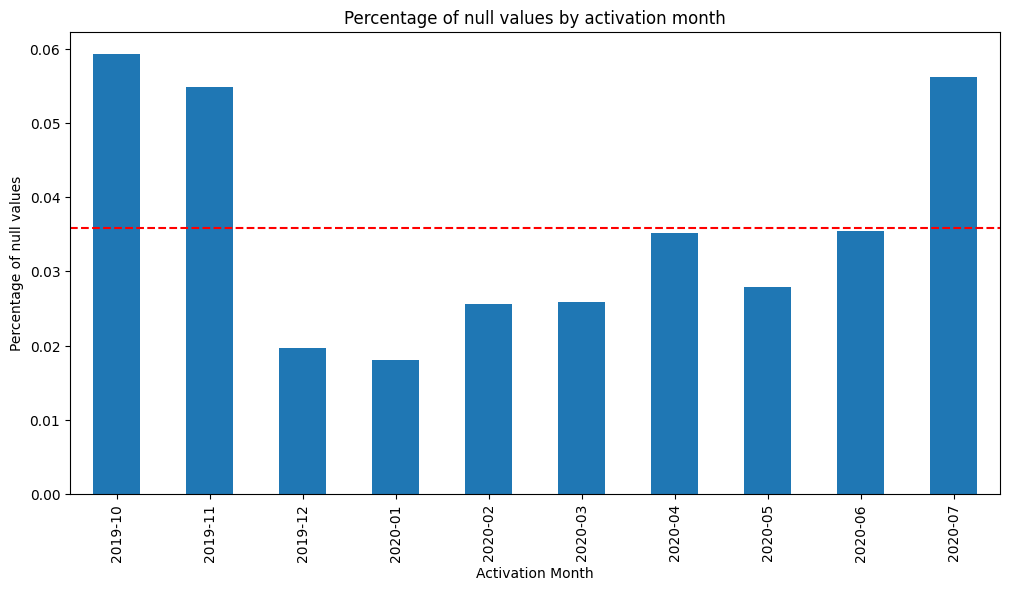

In [19]:
# null values evolution through the years
df['activation_month_year'] = df['activated_date'].dt.to_period('M')
nulls_by_month = df.groupby('activation_month_year')['minimum_payments'].apply(lambda x: x.isnull().mean())

plt.figure(figsize=(12, 6))
nulls_by_month.plot(kind='bar')
plt.title('Percentage of null values ​​by activation month')
plt.ylabel('Percentage of null values')
plt.xlabel('Activation Month')
plt.axhline(y=df['minimum_payments'].isnull().mean(), color='r', linestyle='--')
plt.show()

In [20]:
print(df['minimum_payments'].mean())

864.173245887936


In [21]:
df_imputting_na = df['minimum_payments'].fillna(0)
print(df_imputting_na.mean())

833.1788758398883


**Minimum Payments conclusion**

There are 321 null values in the `'minimum_payments'` column. With thw previous analysis, I can say that these null values belong to customers with low balance (mean < 700), most of the cards were activated in 2020 and all are accounts without fraud. Perhaps the customers have no made

## Question 1

### 1.1 Plot an histogram of the balance amount for all the customers.

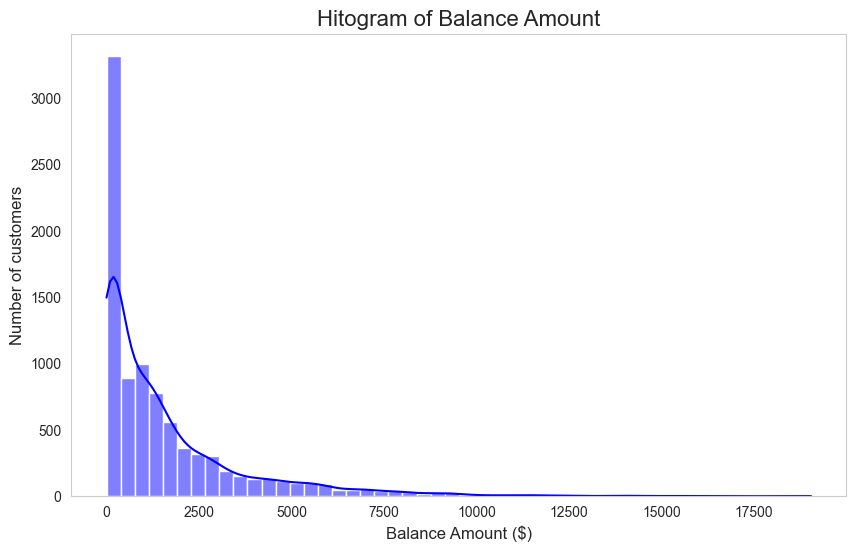

In [22]:
# set the plot style
sns.set_style('whitegrid')

# plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], bins=50, kde=True, color='blue')
plt.title('Hitogram of Balance Amount', fontsize=16)
plt.xlabel('Balance Amount ($)', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.grid(False)
plt.show()

### 1.2 Report any structure you find and any hypotheses you have about that structure

The histogram of Balance Amount shows a strong right-skewed distribution, with the majority of customers concentrated near the lower end of the scale
* Over 3,000 customers have balances close to zero balance. This could be indicate:
  * Customers who pay their credit card in full each month.
  * Recently activated accounts with little or no usage.
  * Inactive accounts or customers who rarely use their credit card.
* There is a long tail extending toward higher balance values, indicating the presence of customers with significantly larger outstanding balances, though they are much fewer in number.

**Hypotheses**
* The skew may reflect responsible usage. Customers avoid carrying large balances
* Credit limit in new customers or high-risk customers
* There are customers that recently have activated their accounts
* Very high balances could be a fraud


### 1.3 Report mean and median balance, grouped by year and month of activated_date

In [23]:
# Extract year an month from 'activated_date'
df['activation_year'] = df['activated_date'].dt.year
df['activation_month'] = df['activated_date'].dt.month

# Group by year and month
balance_stats = df.groupby(['activation_year', 'activation_month'])['balance'].agg(['mean', 'median']).reset_index()

# Columns rename
balance_stats.columns = ['Year', 'Month', 'Mean_Balance', 'Median_Balance']

# New column of fatetime type to represent the first day of the month. This helps to plot 2 years in one line
balance_stats['activation_period'] = pd.to_datetime(balance_stats[['Year', 'Month']].assign(DAY=1))
print(balance_stats)

   Year  Month  Mean_Balance  Median_Balance activation_period
0  2019     10   2482.234166     1524.409377        2019-10-01
1  2019     11   1839.584298     1081.065726        2019-11-01
2  2019     12   2018.788906     1162.588384        2019-12-01
3  2020      1   1854.535889     1175.749847        2020-01-01
4  2020      2   1747.350977      994.841733        2020-02-01
5  2020      3   1554.973023      828.954823        2020-03-01
6  2020      4   1483.183191      910.141912        2020-04-01
7  2020      5   1214.333732      734.557681        2020-05-01
8  2020      6    939.997996      472.791862        2020-06-01
9  2020      7    649.717622      221.291290        2020-07-01


In [24]:
# Sort by the new column
balance_stats = balance_stats.sort_values('activation_period')

In [25]:
print(balance_stats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               10 non-null     int32         
 1   Month              10 non-null     int32         
 2   Mean_Balance       10 non-null     float64       
 3   Median_Balance     10 non-null     float64       
 4   activation_period  10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2)
memory usage: 448.0 bytes
None


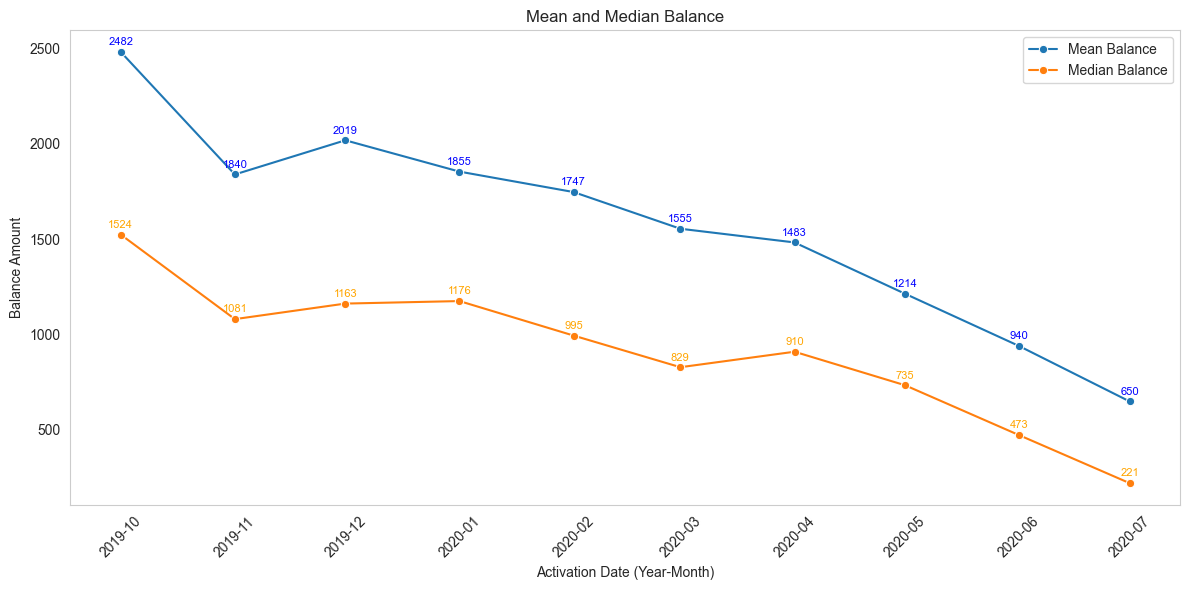

In [26]:
plt.figure(figsize=(12, 6))

# Mean Blance plot
sns.lineplot(
    data=balance_stats,
    x='activation_period',
    y='Mean_Balance',
    marker='o',
    label='Mean Balance'
)

# Median Balance plot
sns.lineplot(
    data=balance_stats,
    x='activation_period',
    y='Median_Balance',
    marker='o',
    label='Median Balance'
)

# Adding notes in the points
for i in range(len(balance_stats)):
    x = balance_stats['activation_period'].iloc[i]
    mean_y = balance_stats['Mean_Balance'].iloc[i]
    median_y = balance_stats['Median_Balance'].iloc[i]
    
    # Notes
    plt.text(x, mean_y + 35, f"{mean_y:.0f}", ha='center', fontsize=8, color='blue')
    plt.text(x, median_y + 35, f"{median_y:.0f}", ha='center', fontsize=8, color='orange')

plt.title("Mean and Median Balance")
plt.xlabel("Activation Date (Year-Month)")
plt.ylabel("Balance Amount")
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

### Report Mean and Median Balance

* The Mean Balance is higher than the Meadian Balance, this reinforces the earlier finding: the right-skewed distribution, with a minority of customers holding significantly larger balances.
* There are not abrupt jumps or discontinuities, this suggest stable customer acquisition and creditusage patterns over time.

**Hypotheses**
* The gap between mean and median is likely caused by a few customers with very high balances, which inflate the mean.
* Customers acquired in late 2019 may have had more active credit behavior, while those acquired in 2020 may have had more conservative usage, contributing to the overall decline in balance.
* The downward trend from 2019 to 2020 could be related to the early pandemic period, during which credit usage may have dropped due to economic uncertainty or changing consumer behavior.

## Question 2

### 2.1 New Table

In [27]:
# Filter by activated date and last payment in 2020
df_2020 = df[
    (df['activated_date'].dt.year == 2020) &
    (df['last_payment_date'].dt.year == 2020)
].copy()

In [28]:
# Just numbers in the 'cust_id'
df_2020['cust_id_clean'] = df_2020['cust_id'].astype(str).str.extract(r'(\d+)')

In [29]:
# New column with the % of 'cash_advance' on 'credit_limit'
df_2020['%_cash_advance'] = (df_2020['cash_advance'] / df_2020['credit_limit']) * 100

In [30]:
# Changing format for 'activated_date'
df_2020['activated_date'] = df['activated_date'].dt.to_period('M')

In [31]:
# Required columns
result_table = df_2020[[
    'cust_id_clean',
    'activated_date',
    'last_payment_date',
    'cash_advance',
    'credit_limit',
    '%_cash_advance'
]].copy()

In [32]:
display(result_table)

,cust_id_clean,activated_date,last_payment_date,cash_advance,credit_limit,%_cash_advance
2633,12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
2634,12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2635,12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2636,12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2637,12714,2020-01,2020-04-26,78.763096,1500.0,5.250873
...,...,...,...,...,...,...
8945,19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
8946,19187,2020-07,2020-09-06,0.000000,1000.0,0.000000
8947,19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
8948,19189,2020-07,2020-07-19,36.558778,500.0,7.311756


In [35]:
print(result_table.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6300 entries, 2633 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cust_id_clean      6300 non-null   object        
 1   activated_date     6300 non-null   period[M]     
 2   last_payment_date  6300 non-null   datetime64[ns]
 3   cash_advance       6217 non-null   float64       
 4   credit_limit       6299 non-null   float64       
 5   %_cash_advance     6216 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1), period[M](1)
memory usage: 344.5+ KB
None
